# Sentiment Analysis using Recurrent Neural Network

### In this notebook you will see text precessing on twitter data set and after that I have performed different Machine Learning Algorithms on the data such as **Logistic Regression, RandomForestClassifier, SVC, Naive Bayes** to classifiy positive and negative tweets. After that I have also built a RNN network which is the best fit for such textual sentiment analysis, since it's a Sequential Dataset which is requirement for RNN network.

#### Let's Dive into it.

# Index

* <a href="#1" style="color: blue;">Importing Libraries</a>
* <a href="#2" style="color: blue;">Loading Dataset</a>
* <a href="#3" style="color: blue;">Data Visualization</a>
* <a href="#4" style="color: blue;">Data Preprocessing</a>
* <a href="#5" style="color: blue;">Analyzing the Data</a>
* <a href="#6" style="color: blue;">Vectorization and Splitting the data</a>
* <a href="#7" style="color: blue;">Model Building</a>
* <a href="#8" style="color: blue;">Logistic Regression</a>
* <a href="#9" style="color: blue;">Linear SVM</a>
* <a href="#10" style="color: blue;">Random Forest</a>
* <a href="#11" style="color: blue;">Naive Bayes</a>
* <a href="#12" style="color: blue;">RNN</a>
* <a href="#13" style="color: blue;">Model Saving, Loading and Prediction</a>

# Importing libraries <a id="1"></a>

In [1]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset <a id="2"></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Dataset 3.csv',encoding='latin')
data

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [4]:
data.rename(columns={'tweets':'text','sentiment':'polarity'},inplace=True)

# Data Visualization <a id="3"></a>

Dataset details
target: the sentiment of the tweet (0 = negative, 1 = positive)

* polarity : the sentiment of the tweet (0 = negative 1 = positive)

* text : the text of the tweet (i'm 10x cooler than all of you)

In [5]:
print("Dataset shape:", data.shape)

Dataset shape: (10314, 2)


In [6]:
data.head(10)

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,so sleepy. good times tonight though,0
6,"@SilkCharm re: #nbn as someone already said, d...",0
7,23 or 24Ã¯Â¿Â½C possible today. Nice,0
8,nite twitterville workout in the am -ciao,0
9,"@daNanner Night, darlin'! Sweet dreams to you",0


In [7]:
data['polarity'].unique()

array([0, 1])

In [8]:
data.describe()

,polarity
count,10314.000000
mean,0.224355
std,0.417177
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         10314
No. of positve tagged sentences is:  2314
No. of negative tagged sentences is: 8000


In [10]:
# get a word count per of text
def word_count(words):
    return len(words.split())

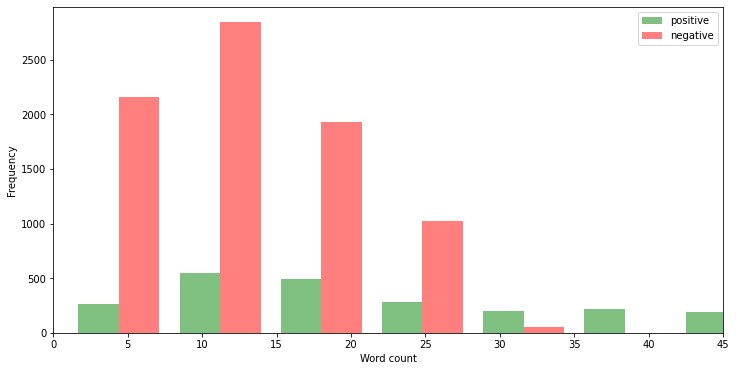

In [11]:
# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [12]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 3748),
 ('and', 2732),
 ('you', 2124),
 ('for', 1632),
 ('depression', 1560),
 ('with', 1129),
 ('that', 1025),
 ('have', 971),
 ('just', 793),
 ("i'm", 788),
 ('your', 742),
 ('but', 698),
 ('are', 657),
 ('was', 637),
 ('this', 606),
 ('good', 603),
 ('not', 589),
 ('like', 526),
 ('love', 516),
 ('all', 501)]

# Data Processing <a id="4"></a>

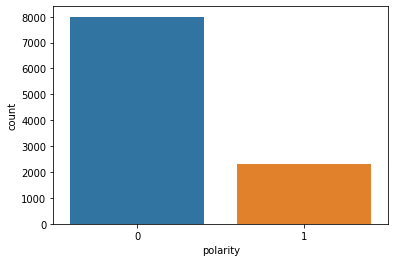

In [13]:
%matplotlib inline
sns.countplot(data['polarity'])

In [14]:
data.head(10)

,text,polarity,word count
0,just had a real good moment. i missssssssss hi...,0,11
1,is reading manga http://plurk.com/p/mzp1e,0,4
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,4
3,@lapcat Need to send 'em to my accountant tomo...,0,22
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,5
5,so sleepy. good times tonight though,0,6
6,"@SilkCharm re: #nbn as someone already said, d...",0,21
7,23 or 24Ã¯Â¿Â½C possible today. Nice,0,6
8,nite twitterville workout in the am -ciao,0,7
9,"@daNanner Night, darlin'! Sweet dreams to you",0,7


In [15]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

text          0.0
polarity      0.0
word count    0.0
dtype: float64

In [16]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [17]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'there', 'any', 'do', 'because', 'or', 'so', 'just', 'our', 'how', 'out', 'into', "isn't", 'it', 'too', 'were', 'above', 'weren', "didn't", 'won', 'than', 'themselves', 'now', 'at', 'doing', 'ours', 'you', 'most', 'until', 'the', 'isn', 'they', 'itself', 'about', 'are', 'not', 'am', 'all', 'and', 'himself', 'ourselves', 'an', "haven't", "needn't", "shan't", 'mustn', 'each', 'she', 'from', 'hasn', 'is', "shouldn't", 'i', 'after', 'who', 'my', 'but', "wouldn't", 'which', 're', 'whom', 'with', 'own', 'his', 'needn', 'shan', "you'll", 'we', 'on', "won't", 'been', 'only', "you've", 'them', 'can', 'your', 'nor', 'was', "she's", 'couldn', 'in', 'against', 'have', "mightn't", 'y', 'when', 'will', "that'll", 'both', 'theirs', 'its', 'under', 'wasn', 'what', "don't", 've', 'doesn', 'having', 'herself', "wasn't", 't', "hasn't", 'their', 'no', "hadn't", 'some', "you'd", 'down', 'll', 'yo

In [18]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [19]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [20]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [21]:
data.head(10)

,text,polarity,word count,processed_tweets
0,just had a real good moment. i missssssssss hi...,0,11,ust real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,0,4,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,4,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,0,22,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,5,dd myspace myspacecomlookthunder
5,so sleepy. good times tonight though,0,6,sleepy good time tonight though
6,"@SilkCharm re: #nbn as someone already said, d...",0,21,silkcharm nbn someone already said fiber home ...
7,23 or 24Ã¯Â¿Â½C possible today. Nice,0,6,24ã¯â¿â½c possible today nice
8,nite twitterville workout in the am -ciao,0,7,ite twitterville workout ciao
9,"@daNanner Night, darlin'! Sweet dreams to you",0,7,dananner night darlin sweet dream


# Analyzing the data <a id="5"></a>

> #### Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

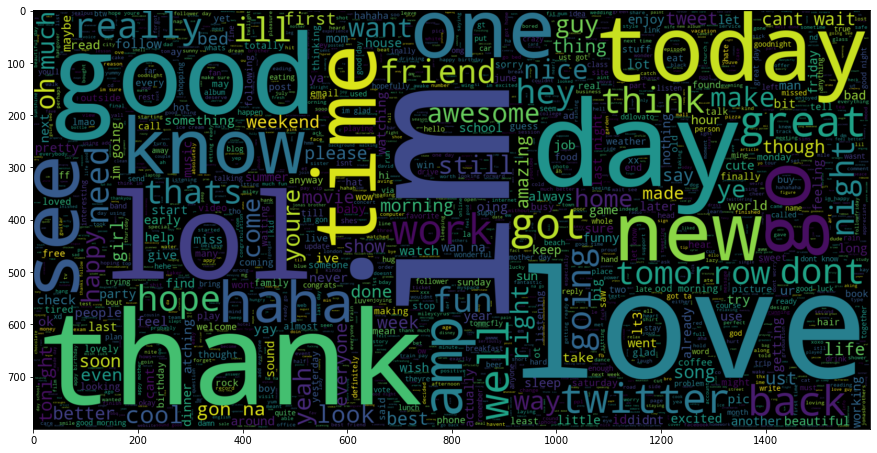

In [22]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

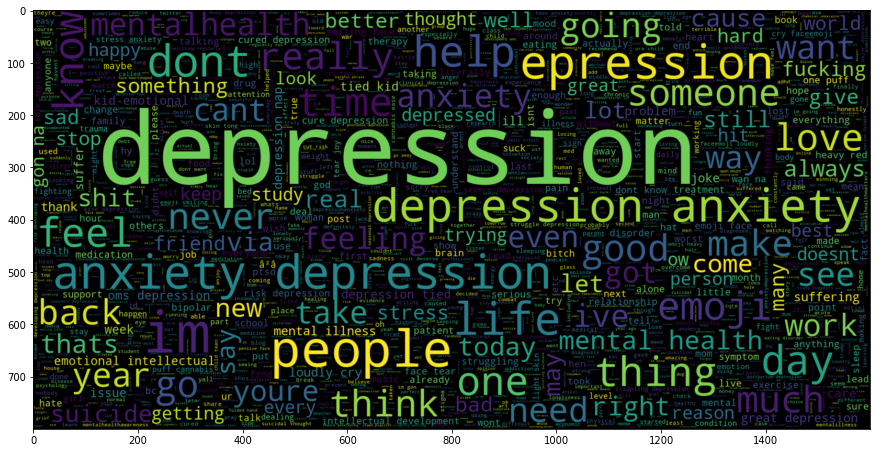

In [23]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [24]:
X = data['processed_tweets'].values
y = data['polarity'].values


In [25]:
print(X.shape)
print(y.shape)

(10314,)
(10314,)


## Convert text to word frequency vectors
### TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [26]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  20893


In [27]:
print(X.shape)
print(y.shape)

(10314, 20893)
(10314,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [29]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (8251, 20893)
y_train (8251,)

X_test (2063, 20893)
y_test (2063,)


# Model Building <a id="7"></a>

### Model evaluating function

In [30]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 98.25475699915161
Accuracy of model on testing data : 97.23703344643722 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1579
           1       1.00      0.88      0.94       484

    accuracy                           0.97      2063
   macro avg       0.98      0.94      0.96      2063
weighted avg       0.97      0.97      0.97      2063



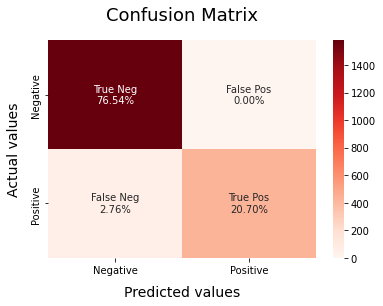

In [31]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 99.9757605138771
Accuracy of model on testing data : 98.64275327193408 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1579
           1       1.00      0.94      0.97       484

    accuracy                           0.99      2063
   macro avg       0.99      0.97      0.98      2063
weighted avg       0.99      0.99      0.99      2063



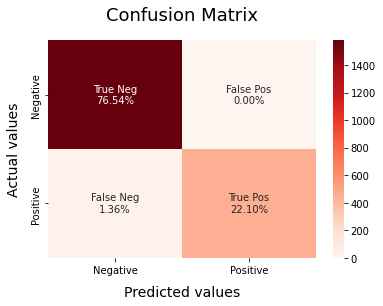

In [32]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### Random Forest <a id="10"></a>

Accuracy of model on training data : 98.58199006181069
Accuracy of model on testing data : 97.67329132331555 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1579
           1       1.00      0.90      0.95       484

    accuracy                           0.98      2063
   macro avg       0.99      0.95      0.97      2063
weighted avg       0.98      0.98      0.98      2063



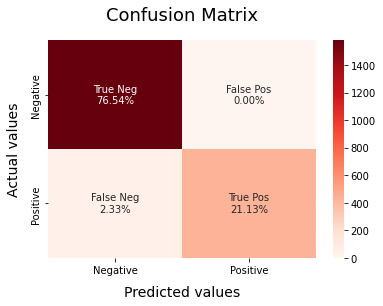

In [33]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes <a id="11"></a>

Accuracy of model on training data : 96.25499939401286
Accuracy of model on testing data : 94.86185167232186 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1579
           1       0.99      0.79      0.88       484

    accuracy                           0.95      2063
   macro avg       0.97      0.89      0.92      2063
weighted avg       0.95      0.95      0.95      2063



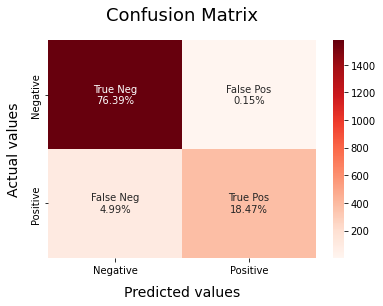

In [34]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# RNN <a id="12"></a>

#### What is RNN?
Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data

#### Embedding Layer
Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks. While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe. Alternatively we can also train our own embeddings using Keras embedding layer.

#### LSTM layer
Long Short Term Memory networks, usually called “LSTMs” , were introduced by Hochreiter and Schmiduber. These have widely been used for speech recognition, language modeling, sentiment analysis and text prediction. Before going deep into LSTM, we should first understand the need of LSTM which can be explained by the drawback of practical use of Recurrent Neural Network (RNN). So, lets start with RNN.

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

In [36]:
import keras
keras.__version__

'2.6.0'

In [37]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  497  197   28]
 [   0    0    0 ...    0    0  475]
 [   0    0    0 ...    0    0 3070]
 ...
 [   0    0    0 ...    1  242  131]
 [   0    0    0 ...    1   65  818]
 [   0    0    0 ...    0    0    0]]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [39]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/10
258/258 [==============================] - 33s 121ms/step - loss: 0.1979 - accuracy: 0.9247 - val_loss: 0.0406 - val_accuracy: 0.9903

Epoch 00001: val_accuracy improved from -inf to 0.99031, saving model to rnn_model.hdf5
Epoch 2/10
258/258 [==============================] - 31s 120ms/step - loss: 0.0286 - accuracy: 0.9927 - val_loss: 0.0340 - val_accuracy: 0.9913

Epoch 00002: val_accuracy improved from 0.99031 to 0.99127, saving model to rnn_model.hdf5
Epoch 3/10
258/258 [==============================] - 31s 120ms/step - loss: 0.0115 - accuracy: 0.9973 - val_loss: 0.0533 - val_accuracy: 0.9893

Epoch 00003: val_accuracy did not improve from 0.99127
Epoch 4/10
258/258 [==============================] - 31s 121ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.0433 - val_accuracy: 0.9874

Epoch 00004: val_accuracy did not improve from 0.99127
Epoch 5/10
258/258 [==============================] - 31s 120ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0502 - val

In [40]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 690,593
Trainable params: 690,593
Non-trainable params: 0
_________________________________________________________________


In [66]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

Negative


In [67]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Negative


In [68]:
sequence = tokenizer.texts_to_sequences(['I had a bad day at work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Negative
